## Detecting patterns in time series
In finance, a lot of trading strategies are based on one of the following:
- **Momentum**—the investors try to use the continuance of the existing market trend to determine their positions
- **Mean-reversion** – the investors assume that properties such as stock returns and volatility will revert to their long-term average over time (also known as an Ornstein-Uhlenbeck process)
  
While we can relatively easily classify a time series as one of the two by inspecting it visually, this solution definitely does not scale well. That is why we can use approaches such as the **Hurst exponent** to identify if a given time series (not necessarily a financial one) is trending, mean-reverting, or simply a random walk.

**Hurst exponent (H)** is a measure for the long-term memory of a time series, that is, it measures the amount by which that series deviates from a random walk. The values of the Hurst exponent range between 0 and 1, with the following interpretation:
- H < 0.5—a series is mean-reverting. The closer the value is to 0, the stronger the mean-reversion process is.
- H = 0.5—a series is a geometric random walk.
- H > 0.5—a series is trending. The closer the value is to 1, the stronger the trend.

There are a few ways of calculating the Hurst exponent. In this recipe, we will focus on the one based on estimating the rate of the diffusive behavior, which is based on the variance of log prices. For the practical example, we will use 20 years of daily S&P 500 prices.

1. Import the libraries:

In [9]:
import yfinance as yf
import numpy as np
import pandas as pd

2. Download the S&P's price from 2000-2019:

<Axes: title={'center': 'S&P 500 (years 2000-2019)'}, xlabel='Date'>

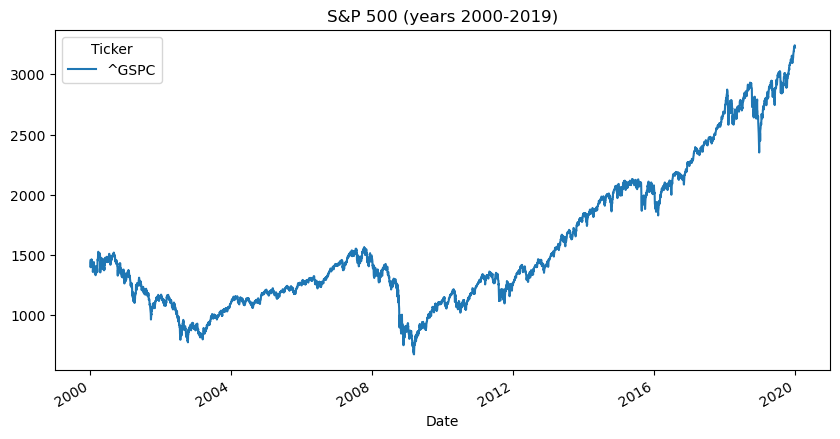

In [14]:
df = yf.download("^GSPC",
                 start="2000-01-01",
                 end="2019-12-31",
                 auto_adjust=True,
                 progress=False)
df["Close"].plot(title="S&P 500 (years 2000-2019)", figsize=(10,5))

We plot the data to get some initial intuition of what to expect from the calculated Hurst exponent.

3. Define a function that will calculate Hust Exponent:

In [20]:
def get_hurst_exponent(ts, max_lag=20):
    """Returns the Hurst Exponent of the time series"""
    lags = range(2, max_lag)
    tau = [np.std(np.subtract(ts[lag:], ts[:-lag])) for lag in lags]
    hurst_exp = np.polyfit(np.log(lags), np.log(tau), 1)[0]
    return hurst_exp

4. Calculate the values of the Hurst exponent using different values for the max_lag parameter:

In [23]:
for lag in [20, 100, 250, 500, 1000]:
    hurst_exp = get_hurst_exponent(df["Close"].values, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")

Hurst exponent with 20 lags: 0.4481
Hurst exponent with 100 lags: 0.4513
Hurst exponent with 250 lags: 0.4918
Hurst exponent with 500 lags: 0.5265
Hurst exponent with 1000 lags: 0.5178


The more lags we include, the closer we get to the verdict that the S&P 500 series is a random walk.

5. Narrow down the data to the years 2005 to 2007 and calculate the exponents one more time:

In [27]:
shorter_series = df.loc["2005":"2007", "Close"].values
for lag in [20, 100, 250, 500]:
    hurst_exp = get_hurst_exponent(shorter_series, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")

Hurst exponent with 20 lags: 0.3989
Hurst exponent with 100 lags: 0.3215
Hurst exponent with 250 lags: 0.2507
Hurst exponent with 500 lags: 0.1258


It seems that the series from the 2005 to 2007 period is mean-reverting. For reference, the
discussed time series is illustrated as follows:

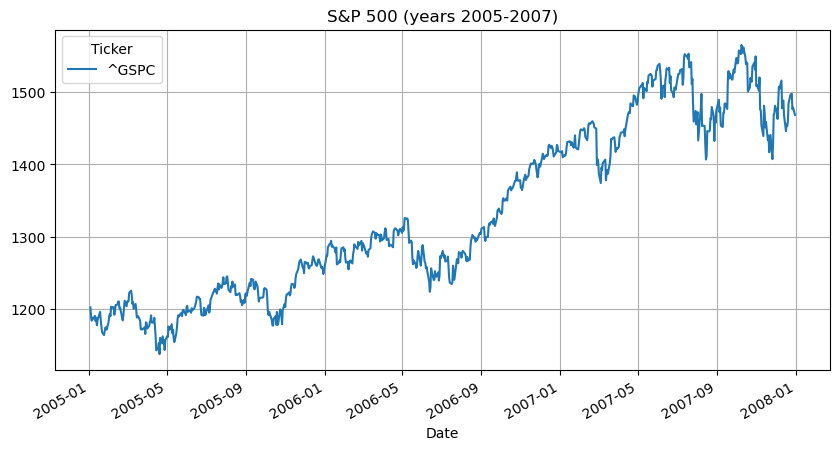

In [36]:
import matplotlib.pyplot as plt
df2=df.loc["2005":"2007", "Close"]
df2.plot(title="S&P 500 (years 2005-2007)", figsize=(10,5))
plt.grid(True)

<Axes: title={'center': 'S&P 500 (years 2000-2019)'}, xlabel='Date'>

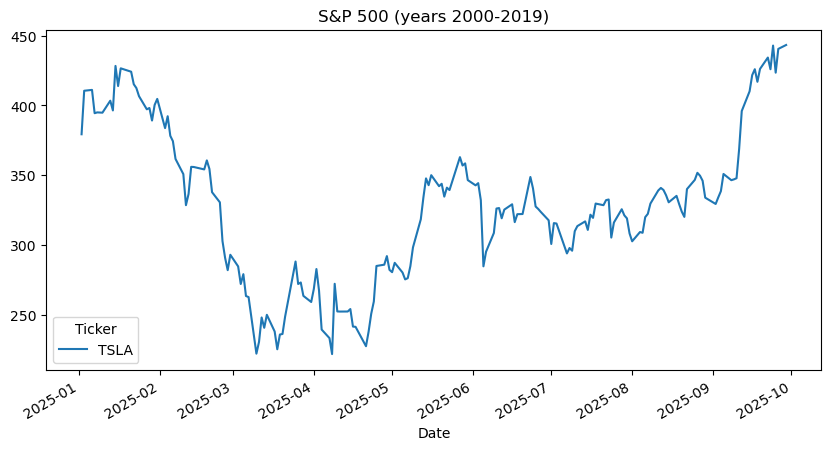

In [46]:
df = yf.download("TSLA",
                 start="2025-01-01",
                 end="2025-09-30",
                 auto_adjust=True,
                 progress=False)
df["Close"].plot(title="S&P 500 (years 2000-2019)", figsize=(10,5))